In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


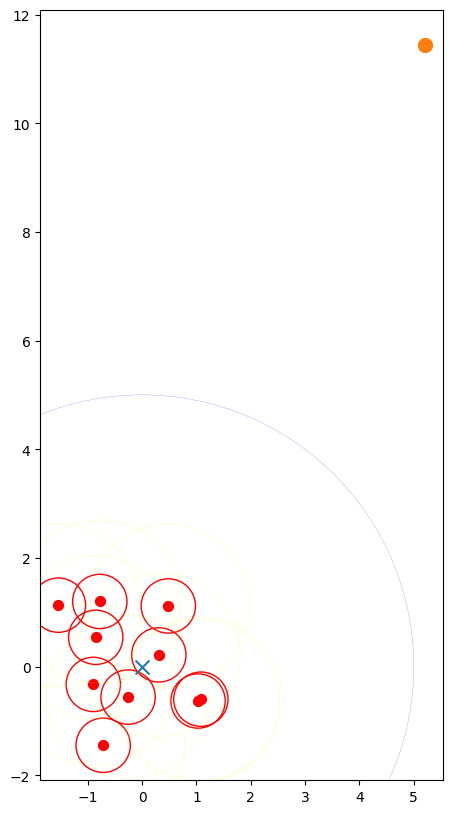

In [20]:
from environment import myEnv

# Create the environment
env = myEnv()
state = env.reset()
env.render()

In [21]:
# Example of using the environment
num_episodes = 1
for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    
    states = []
    while not done:
        states.append(env.state)
        action = env.action_space.sample()  # Random action
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
    
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

env.close()

Episode 1 finished with total reward: 1


(0, 0)

# Replay game

In [23]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


logs = states[-50:]
fig, ax = env.fig, env.ax


sc = ax.scatter(logs[0][0], logs[0][1], s=100, marker="o")

# Set the limits of the axes
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_title("Play")
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Update function for the animation
def update(frame):
    x, y = logs[frame]
    sc.set_offsets(np.column_stack((x, y))) 
    return sc

# Create the animation
animation = FuncAnimation(fig, update, frames=len(logs), blit=False, repeat=True)

# Display the animation in Jupyter Notebook
display(HTML(animation.to_jshtml()))

In [24]:
len(logs)

50